In [1]:
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
train_df = pd.read_csv('twitter_training.csv', header=None)
valid_df = pd.read_csv('twitter_validation.csv', header=None)

In [3]:
train_df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
valid_df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
train_df['Tweet'] = train_df['Tweet'].astype(str)
train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)
train_df.head(10)

,ID,Entity,Sentiment,Tweet
8581,9472,Overwatch,Neutral,My goodness @ AmbarKOrtiz was SO mad at me for...
71534,11054,TomClancysGhostRecon,Positive,I must say that for every moment of fun I have...
67252,7116,johnson&johnson,Neutral,Business AwesomeCapital : Johnson & Meyer John...
41061,1446,Battlefield,Positive,Here it was! I found the Perfect Flamethrower ...
16591,9643,PlayStation5(PS5),Positive,It is not the first time that the EU Commissio...
23891,4495,Google,Negative,@SamsungMobileUS We opened @Google Streetview ...
942,2567,Borderlands,Neutral,Chris loves me in borderlands one and two.
53507,10794,RedDeadRedemption(RDR),Positive,THE CLASSIC
72117,11154,TomClancysGhostRecon,Neutral,Ghost recon © .. store.playstation.com/
12019,8467,NBA2K,Negative,I've been playing this game for 5 days and I h...


In [4]:
#TF-IDF,RF(UN PROCESSED)
X_train, X_test, y_train, y_test = train_test_split(train_df['Tweet'], train_df['Sentiment'], test_size=0.2, random_state=42)

In [5]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [6]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = rf_classifier.predict(X_test_tfidf)
class_report_nprepross = classification_report(y_test, y_pred)
print("Test Set Evaluation:")
print(class_report_nprepross)

Test Set Evaluation:
              precision    recall  f1-score   support

  Irrelevant       0.95      0.80      0.87      2033
    Negative       0.88      0.91      0.89      3595
     Neutral       0.86      0.88      0.87      2956
    Positive       0.86      0.89      0.87      3365

    accuracy                           0.88     11949
   macro avg       0.89      0.87      0.88     11949
weighted avg       0.88      0.88      0.88     11949



In [8]:
#PREPROCESSING
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mitra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mitra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mitra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [10]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(stemmer.stem(token)) for token in tokens if token.isalpha()]
    return ' '.join(tokens)

In [11]:
text_column = 'Tweet'
train_df[text_column] = train_df[text_column].apply(preprocess_text)
test_df[text_column] = test_df[text_column].apply(preprocess_text)
valid_df[text_column] = valid_df[text_column].apply(preprocess_text)

In [12]:
train_df[text_column] = train_df[text_column].fillna('')
test_df[text_column] = test_df[text_column].fillna('')
valid_df[text_column] = valid_df[text_column].fillna('')

In [13]:
train_df[text_column] = train_df[text_column].str.lower()
test_df[text_column] = test_df[text_column].str.lower()
valid_df[text_column] = valid_df[text_column].str.lower()

In [14]:
#MODEL(TF-IDF,RF)
X_train, X_test, y_train, y_test = train_test_split(train_df['Tweet'], train_df['Sentiment'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(
                             max_features = 20000,
                             sublinear_tf = True,
                             use_idf = True,
                             stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [15]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)
y_pred = rf_classifier.predict(X_test_tfidf)

print("Test Set Evaluation [no preprocessing]:")
print(class_report_nprepross)

Test Set Evaluation [no preprocessing]:
              precision    recall  f1-score   support

  Irrelevant       0.95      0.80      0.87      2033
    Negative       0.88      0.91      0.89      3595
     Neutral       0.86      0.88      0.87      2956
    Positive       0.86      0.89      0.87      3365

    accuracy                           0.88     11949
   macro avg       0.89      0.87      0.88     11949
weighted avg       0.88      0.88      0.88     11949



In [16]:
print("Test Set Evaluation [preprocessed]:")
print(classification_report(y_test, y_pred))

Test Set Evaluation [preprocessed]:
              precision    recall  f1-score   support

  Irrelevant       0.94      0.79      0.86      2033
    Negative       0.90      0.90      0.90      3595
     Neutral       0.88      0.87      0.88      2956
    Positive       0.82      0.92      0.87      3365

    accuracy                           0.88     11949
   macro avg       0.89      0.87      0.88     11949
weighted avg       0.88      0.88      0.88     11949



In [17]:
dataset = pd.concat([train_df, valid_df], ignore_index = False)
dataset['Entity'].value_counts()

Entity
Verizon                              1950
MaddenNFL                            1949
CallOfDuty                           1948
TomClancysRainbowSix                 1938
LeagueOfLegends                      1936
ApexLegends                          1935
FIFA                                 1929
Facebook                             1926
Microsoft                            1926
CallOfDutyBlackopsColdWar            1922
Xbox(Xseries)                        1919
WorldOfCraft                         1918
Dota2                                1917
CS-GO                                1909
TomClancysGhostRecon                 1908
PlayStation5(PS5)                    1905
Battlefield                          1904
johnson&johnson                      1899
Overwatch                            1892
Amazon                               1887
Google                               1885
NBA2K                                1882
GrandTheftAuto(GTA)                  1877
Nvidia                     

In [18]:
dataset.isna().sum()
dataset.duplicated().sum()

4709

In [19]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
dataset.isnull().sum()
dataset.duplicated().sum()

0

<Axes: xlabel='Entity'>

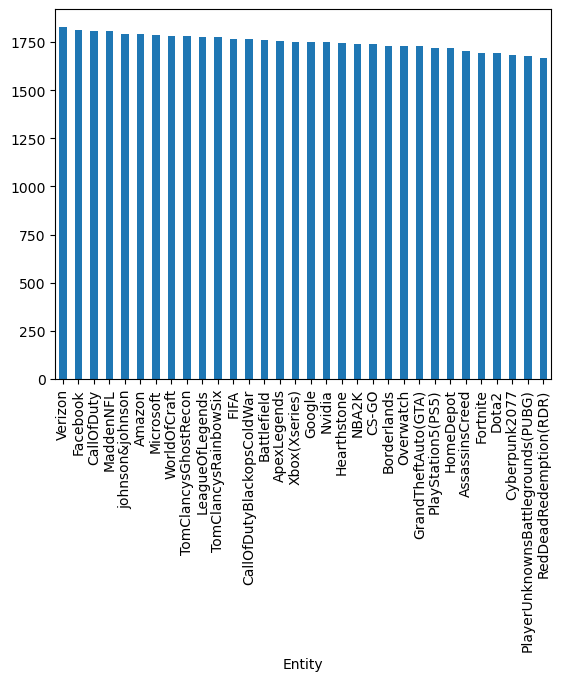

In [20]:
dataset['Entity'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Sentiment', ylabel='Entity'>

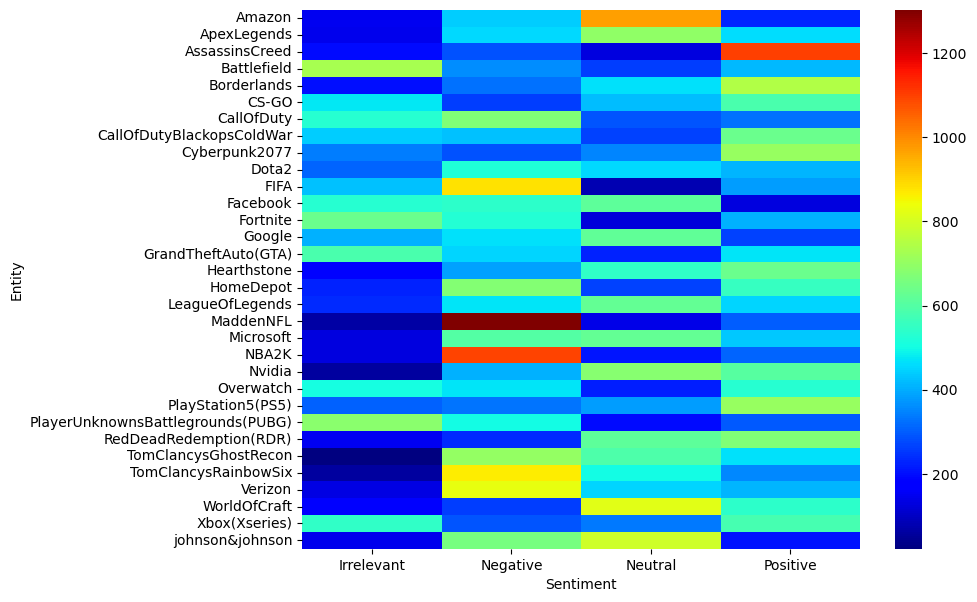

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))
crosstab = pd.crosstab(index=dataset['Entity'], columns=dataset['Sentiment'])
sns.heatmap(crosstab, cmap = 'jet')

In [22]:
crosstab.head()

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
Amazon,151,438,972,230
ApexLegends,145,456,697,461
AssassinsCreed,195,286,128,1098
Battlefield,729,358,262,415
Borderlands,198,324,466,744


In [23]:
X = dataset['Tweet'] 
y = dataset['Sentiment'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [26]:
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8802640970735189


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.77      0.85      1943
    Negative       0.86      0.92      0.89      3318
     Neutral       0.87      0.89      0.88      2797
    Positive       0.87      0.90      0.88      3150

    accuracy                           0.88     11208
   macro avg       0.89      0.87      0.88     11208
weighted avg       0.88      0.88      0.88     11208

